# The Game of Life
In NumPy. Adapted from http://www.labri.fr/perso/nrougier/teaching/numpy/numpy.html.

![Game of Life](game-of-life.png)

The game of life is an example of cellular automation. A cell is either alive or dead; cells die and replicate based on the number of living neighbours determined by 4 simple rules. Let $x$ be the number of neighbours of a live cell $c$.
1. If $x < 2$, $c$ dies (of boredom, I guess).
2. If $x > 3$, $c$ also dies (of stimulus satiation). Poor $c$.
3. If $x = 2$ _or_ $x = 3$, $c$ lives. Yay! The sweet spot.
4. If $c$ was dead and $x = 3$, it would return to the living again.

What is interesting: This is entirely deterministic; every state is a function of only the previous state.

Now, let's put this into code. Let the games begin.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

We create a numpy array to hold our cells. Take care of them, numpy.

In [2]:
Z = np.array([[0,0,0,0,0,0],
              [0,0,0,1,0,0],
              [0,1,0,1,0,0],
              [0,0,1,1,0,0],
              [0,0,0,0,0,0],
              [0,0,0,0,0,0]])

For sanity, here's the dataype of our array.

In [3]:
Z.dtype

dtype('int64')

Let's see if our array is also nicely shaped.

In [4]:
Z.shape

(6, 6)

Again, access is done as usual in python. We can also slice through our array. Let's take a lot at the top-left quadrant, for instance.

In [5]:
Y = Z[0:3, 0:3]
Y

array([[0, 0, 0],
       [0, 0, 0],
       [0, 1, 0]])

Changing a cell in a subarray also changes the respective cell in the whole array.

In [6]:
Y[1, 1] = 1
Z

array([[0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

We can check if an array is part of another one like this:

In [7]:
Y.base is Z

True

### Counting neighbors

Remember that we can manipulate matrices using numpy as if they were scalars. Remember _broadcasting_ for arithmetic operations between (mainly) matrices and scalars. As we want to add matrices whose dimensions can't be broadcast, we will use vectorize computation instead.

Let's reinitialize $Z$, so we know its values.

In [8]:
Z = np.array([[0,0,0,0,0,0],
              [0,0,0,1,0,0],
              [0,1,0,1,0,0],
              [0,0,1,1,0,0],
              [0,0,0,0,0,0],
              [0,0,0,0,0,0]])

We consider the peripheral cells as a 0-border. Our main petri dish is thus the inner 4x4 matrix.

In order to count the number of neighbours of each cell, we use matrix addition. As each cell has 6 neighbours, we take the inner 4x4 matrix and shift it in all six directions by one cell. Like this, each of the shifted 4x4 matrices contains the number of neighbors on one side of each cell in the inner 4x4 matrix, e.g. Z[1:-1, :2] contains the number of left neighbours of each cell. By adding up all 4x4 matrices (excluding the inner 4x4 matrix), we arrive at a matrix containing the total count of neighbors of each cell in $Z$.

In [9]:
N = np.zeros(Z.shape, dtype=int)
N[1:-1, 1:-1] = (Z[ :-2, :-2] + Z[ :-2,1:-1] + Z[ :-2,2:] +
                     Z[1:-1, :-2]                + Z[1:-1,2:] +
                     Z[2:  , :-2] + Z[2:  ,1:-1] + Z[2:  ,2:])
N

array([[0, 0, 0, 0, 0, 0],
       [0, 1, 3, 1, 2, 0],
       [0, 1, 5, 3, 3, 0],
       [0, 2, 3, 2, 2, 0],
       [0, 1, 2, 2, 1, 0],
       [0, 0, 0, 0, 0, 0]])

Let's compare this with $Z$ to make sure we didn't mess anything up.

In [10]:
Z

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

Seems good. Let's proceed to now the full function call.

### Iterating

Now, let's write a function, which does this iteratively. We could either write the function using __np.argwhere__, which returns indices of cells fulfilling certain conditions, to write the rules, e.g.:

In [11]:
np.argwhere( (Z == 1 ) & (N < 2))

array([[1, 3],
       [2, 1]])

On the other hand, we can represent the new-born and surviving cells simply as arrays. Putting this all together, we arrive at the following function:

In [12]:
def iterate(Z):
    # count neighbors
    N = np.zeros(Z.shape, dtype=int)
    N[1:-1, 1:-1] = (Z[ :-2, :-2] + Z[ :-2,1:-1] + Z[ :-2,2:] +
                     Z[1:-1, :-2]                + Z[1:-1,2:] +
                     Z[2:  , :-2] + Z[2:  ,1:-1] + Z[2:  ,2:])
        
    # Apply rules
    # cell is born if it has 3 neighbors, is dead
    birth = (N == 3) & (Z == 0)
    
    # cell survives if it has 2 or 3 neighbors
    survive = (((N == 2) | (N == 3)) & (Z == 1))
    Z[...] = 0
    Z[birth | survive] = 1
    return Z

Both _birth_ and _survive_ return boolean matrices. Let's take a look.

In [13]:
(N == 3) & (Z == 0) # new-born cells

array([[False, False, False, False, False, False],
       [False, False,  True, False, False, False],
       [False, False, False, False,  True, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]], dtype=bool)

In [14]:
(((N == 2) | (N == 3)) & (Z == 1)) # surviving cells

array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False,  True, False, False],
       [False, False,  True,  True, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]], dtype=bool)

Now, let's see if everything works correctly. Let's take a look at $Z$ again for reference.

In [15]:
Z

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

Let's now look at the next generation of cells.

In [16]:
iterate(Z)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

Let's go three generations further now.

In [17]:
for i in range(3):
    iterate(Z)
Z

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0]])

This is an interesting pattern: The population has shifted in a total of 4 generations by one cell diagonally from its initial position. This is a characteristic of the [glider pattern](https://en.wikipedia.org/wiki/Glider_(Conway%27s_Life).

### Getting bigger

Let's look at some bigger arrays now. We initialize one randomly:

In [18]:
Z = np.random.randint(0, 2, (256, 512))

We iterate as previously and display the result.

([], <a list of 0 Text yticklabel objects>)

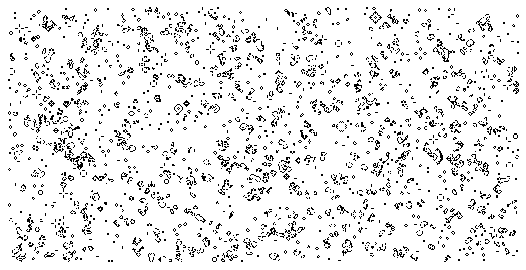

In [19]:
for i in range(100):
    iterate(Z)
size = np.array(Z.shape)
dpi = 72.0
figsize = size[1]/float(dpi), size[0]/float(dpi)
fig = plt.figure(figsize=figsize, dpi=dpi, facecolor="white")
fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False)
plt.imshow(Z, interpolation='nearest', cmap=plt.cm.gray_r)
plt.xticks([])
plt.yticks([])

### More complex patterns
Let's look at some more complex patterns. [Gray Scott equations](http://groups.csail.mit.edu/mac/projects/amorphous/GrayScott/) model reactions of chemical species reminiscent of those often seen in nature.

Let $U$ and $V$ be two chemical species with respective concentrations $u$ and $v$ and diffusion rates $r_u$ and $r_v$. $V$ is converted into $P$ with a rate of conversion $k$. $f$ represents the rate of the process that feeds $U$ and drains $U$, $V$, and $P$. They obey the following reactions and equations.

#### Chemical reaction:
$U + 2V \to 3 V$

$V \to P$

#### Equations:
$\frac{\partial u}{\partial t} = r_u \nabla^2 u - uv^2 + f(1 - u)$

$\frac{\partial v}{\partial t} = r_v \nabla^2 v + uv^2 + (f + k) v$

Instead of having two separate arrays for $U$ and $V$, we use a [structured array](http://docs.scipy.org/doc/numpy/user/basics.rec.html).

In [20]:
n = 200
Z = np.zeros((n+2, n+2), [('U', np.double), ('V', np.double)])
Z.dtype

dtype([('U', '<f8'), ('V', '<f8')])

$Z$ is an n+2xn+2 matrix, as we again need the borders when computing the neighbors. The differential equations only need to be computed in the center part, though.

In [21]:
U, V = Z['U'], Z['V']
u, v = U[1:-1, 1:-1], V[1:-1, 1:-1]

We can now approximate the Laplacian via the [finite difference method](http://www.labri.fr/perso/nrougier/teaching/numpy/numpy.html) using the same vectorization as for the Game of Life:

In [22]:
def laplacian(Z):
    return (                 Z[0:-2,1:-1] +
            Z[1:-1,0:-2] - 4*Z[1:-1,1:-1] + Z[1:-1,2:] +
                             Z[2:  ,1:-1] )

We can now look at the result of the iteration after having chossen some interesting parameters:

([], <a list of 0 Text yticklabel objects>)

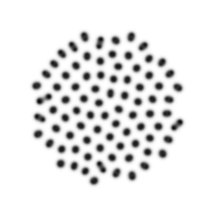

In [23]:
# set parameters
Du, Dv, F, k = 0.16, 0.08, 0.035, 0.065 # Bacteria 1

# set initial values for matrices and concentrations
r = 20
u[...] = 1.0
U[n/2-r:n/2+r, n/2-r:n/2+r] = 0.50
V[n/2-r:n/2+r, n/2-r:n/2+r] = 0.25
u += 0.05*np.random.random((n,n))
v += 0.05*np.random.random((n,n))

for i in range(10000):
    Lu = laplacian(U)
    Lv = laplacian(V)
    uvv = u*v*v
    u += (Du * Lu - uvv + F * (1 - u))
    v += (Dv * Lv + uvv - (F + k) * v)


size = np.array(Z.shape)
dpi = 72.0
figsize= size[1]/float(dpi), size[0]/float(dpi)
fig = plt.figure(figsize=figsize, dpi=dpi, facecolor="white")
fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False)
im = plt.imshow(V, interpolation='bicubic', cmap=plt.cm.gray_r)
plt.xticks([])
plt.yticks([])

That's all, folks. See you next time.